In [97]:
from tqdm import tqdm
import numpy as np

from seaborn import despine
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets

# Computer vision

In [11]:
# load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# set class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

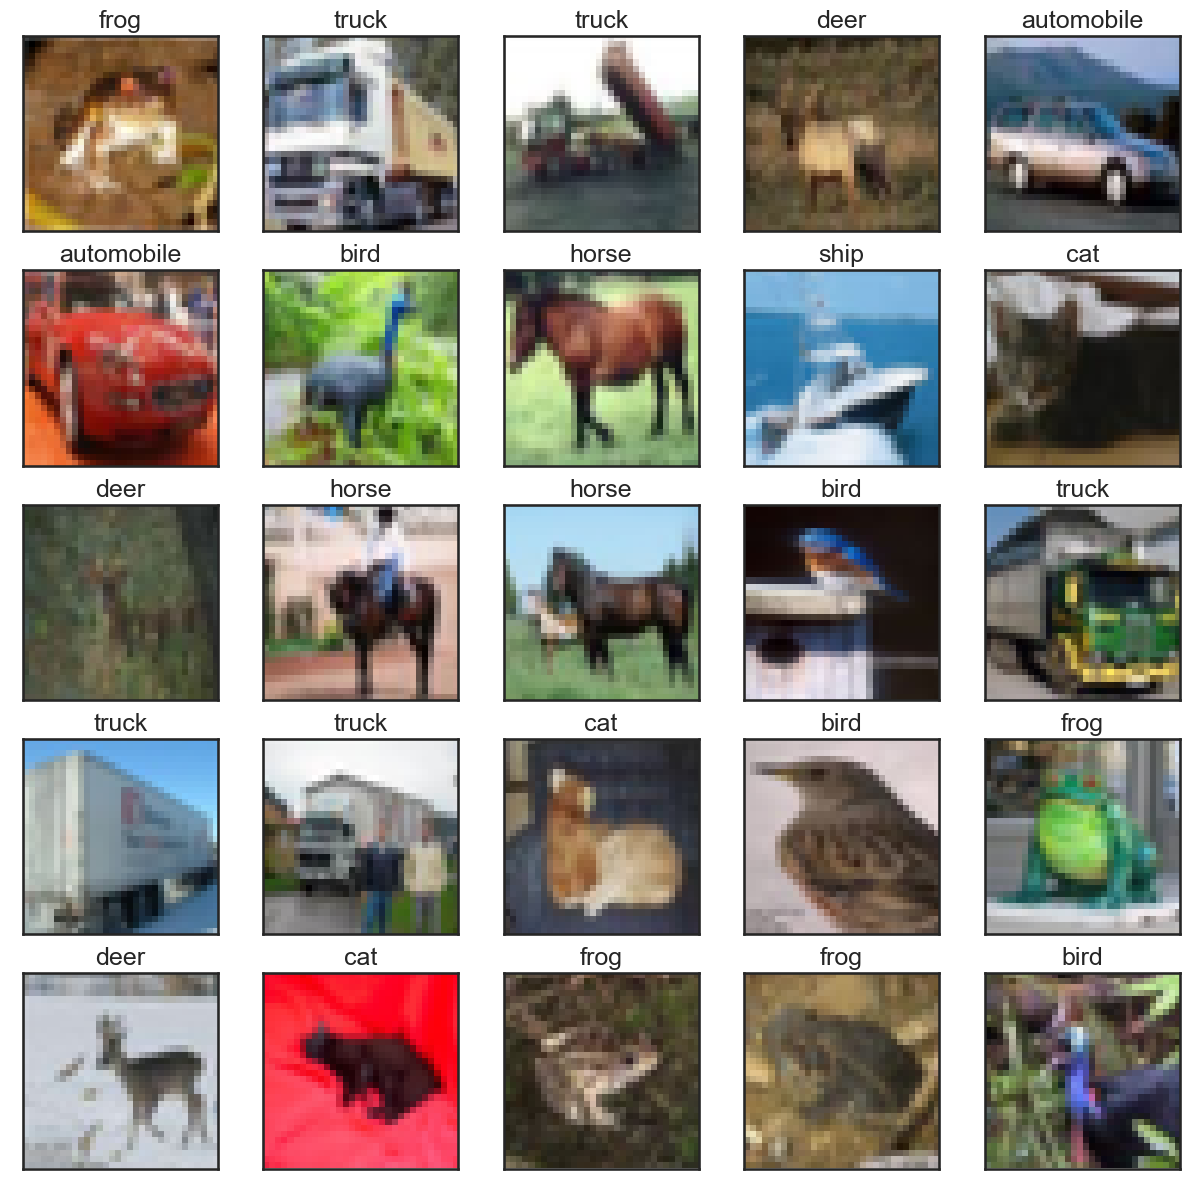

In [121]:
fig, axs = plt.subplots(5,5,figsize=(15,15), dpi=100)
axs = axs.ravel()

for i, ax in enumerate(axs):
    ax.imshow(train_images[i])
    ax.set_title(class_names[train_labels[i,0]])
    ax.set_xticks([])
    ax.set_yticks([])

# Inspired by Human Vision

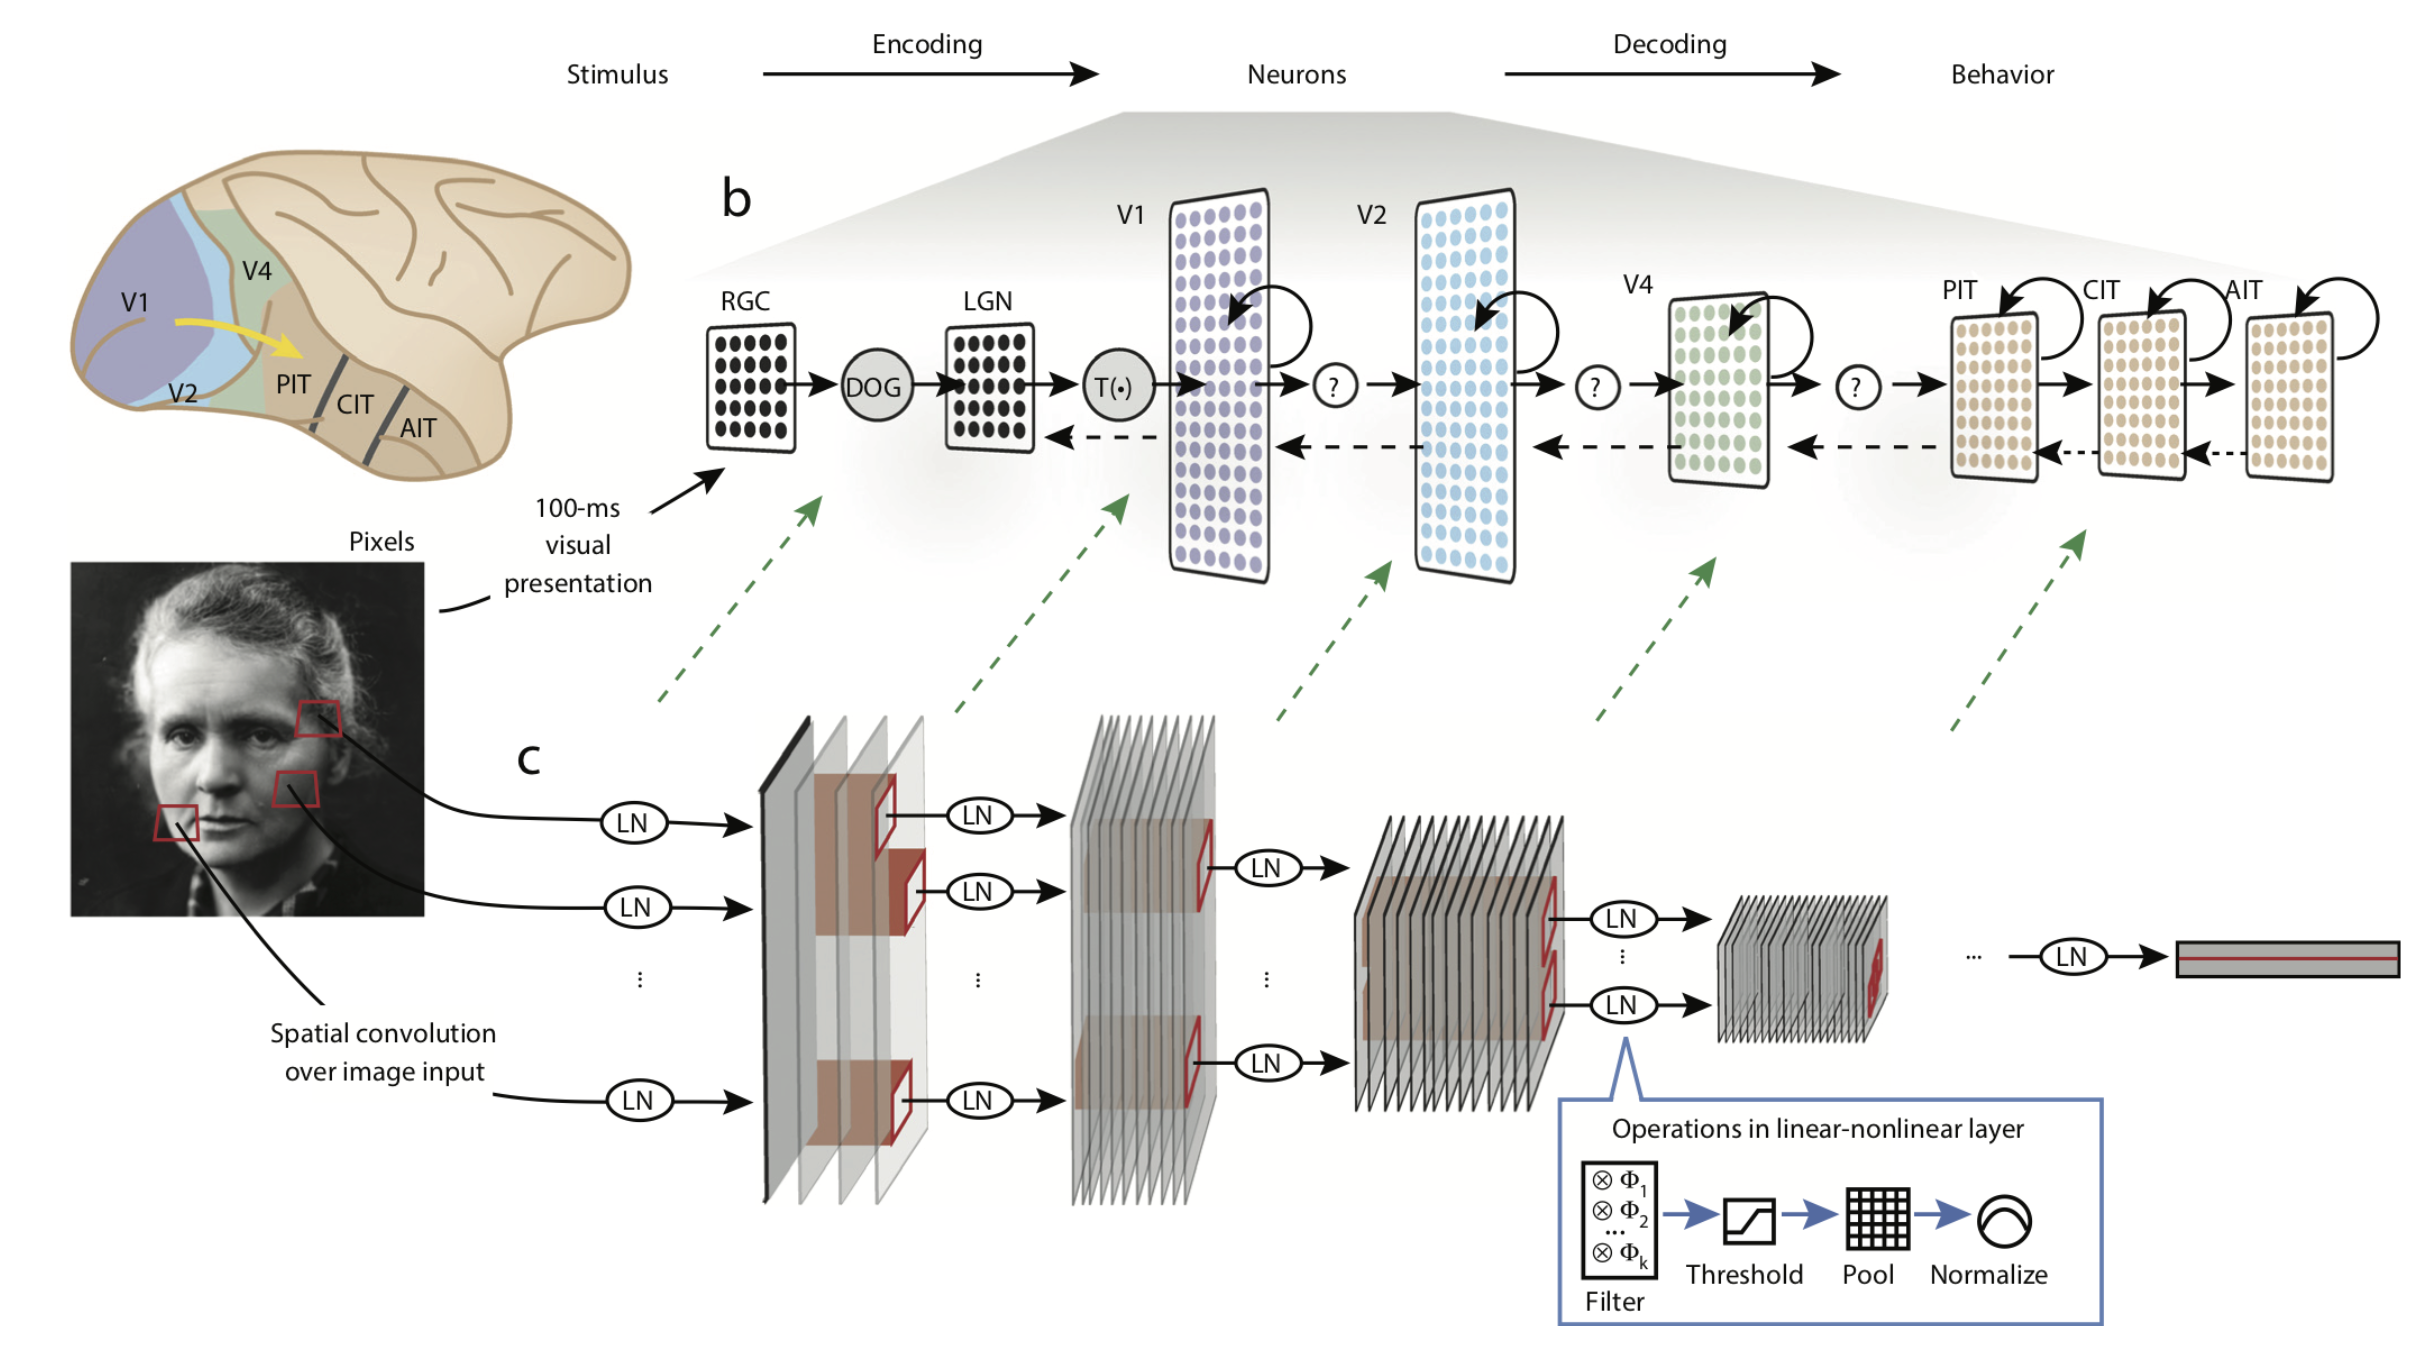

In [18]:
Image(filename='materials/images/Human-Vision-CNN.png')

Adapted from: 

Yamins, Daniel LK, and James J. DiCarlo. "Using goal-driven deep learning models to understand sensory cortex." Nature neuroscience 19.3 (2016): 356-365.

# Convolution Kernel / Filter

## Convolving the filter over the Input:

In [93]:
def convolution_in_2D(image, kernel, bias=0):
    m, n, z = kernel.shape # make sure kernel is square
    if (m == n):
        yin, xin, zin = image.shape
        yout = yin - m + 1
        xout = xin - m + 1
        convolved_image = np.zeros((yout,xout))
        for i in range(yout):
            for j in range(xout):
                convolved_image[i,j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
    return convolved_image

![SegmentLocal](materials/images/convolution.gif "segment")

source: https://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37

![SegmentLocal](materials/images/convolution-1.gif "segment")

source: https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

### edge detection filters

In [84]:
# sobel: https://en.wikipedia.org/wiki/Sobel_operator
vertical_edge_kernel = np.zeros((3,3,3))
vertical_edge_kernel[:,0] = 1
vertical_edge_kernel[:,2] = -1
vertical_edge_kernel[1,0] = 2
vertical_edge_kernel[1,2] = -2
vertical_edge_kernel[...,0]

array([[ 1.,  0., -1.],
       [ 2.,  0., -2.],
       [ 1.,  0., -1.]])

In [85]:
horizontal_edge_kernel = np.zeros((3,3,3))
horizontal_edge_kernel[0] = 1
horizontal_edge_kernel[2] = -1
horizontal_edge_kernel[0,1] = 2
horizontal_edge_kernel[2,1] = -2
horizontal_edge_kernel[...,0]

array([[ 1.,  2.,  1.],
       [ 0.,  0.,  0.],
       [-1., -2., -1.]])

In [86]:
edge_detection_kernel = -1.0 * np.ones((3,3,3))
edge_detection_kernel[1,1] = 8
edge_detection_kernel[...,0]

array([[-1., -1., -1.],
       [-1.,  8., -1.],
       [-1., -1., -1.]])

Text(0.5, 1.0, 'Edge')

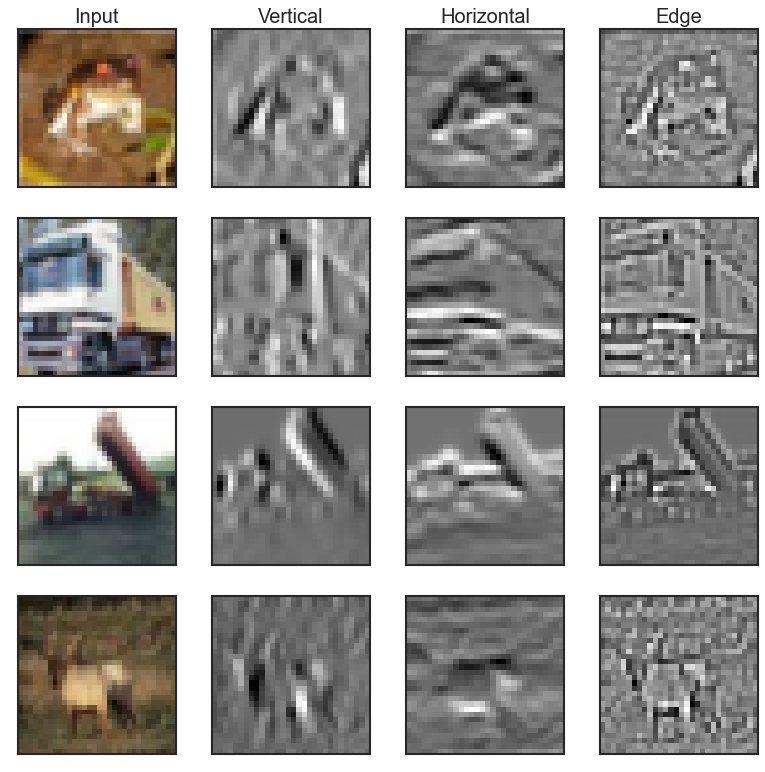

In [124]:
fig, axs = plt.subplots(4,4,figsize=(12,12), dpi=80)
for i in range(4):
    
    # input image
    axs[i,0].imshow(train_images[i])

    # vertical
    convolved_img = convolution_in_2D(train_images[i], vertical_edge_kernel)
    axs[i,1].imshow(convolved_img, cmap='gray')
    
    # horizontal
    convolved_img = convolution_in_2D(train_images[i], horizontal_edge_kernel)
    axs[i,2].imshow(convolved_img, cmap='gray')
    
    # edge
    convolved_img = convolution_in_2D(train_images[i], edge_detection_kernel)
    axs[i,3].imshow(convolved_img, cmap='gray')

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

axs[0,0].set_title('Input')
axs[0,1].set_title('Vertical')
axs[0,2].set_title('Horizontal')
axs[0,3].set_title('Edge')

# Setting up a CNN in Tensorflow 2

In [ ]:
Image(filename='materials/images/convolution-6.png')

source: https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

In [98]:
from tensorflow.keras import datasets, layers, models

In [110]:
model = models.Sequential()

# convolution layers
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# add dense output layers
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

# Fitting

In [114]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [115]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6499 - accuracy: 0.3942 - val_loss: 1.4504 - val_accuracy: 0.4743
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3606 - accuracy: 0.5110 - val_loss: 1.2724 - val_accuracy: 0.5439
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2531 - accuracy: 0.5543 - val_loss: 1.2524 - val_accuracy: 0.5492
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1832 - accuracy: 0.5838 - val_loss: 1.1662 - val_accuracy: 0.5861
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1360 - accuracy: 0.6013 - val_loss: 1.1422 - val_accuracy: 0.5959
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0917 - accuracy: 0.6162 - val_loss: 1.1275 - val_accuracy: 0.6013
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0582 - accuracy: 0.6293 - val_loss: 1.0934 - val_ac

313/313 - 1s - loss: 1.0766 - accuracy: 0.6191


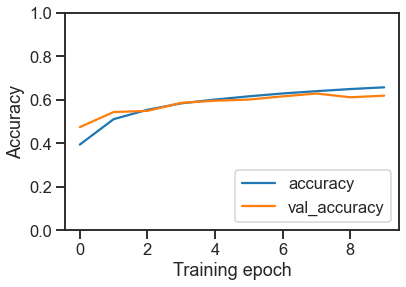

In [120]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Training epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Exploring filters

In [126]:
weights = model.get_weight()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


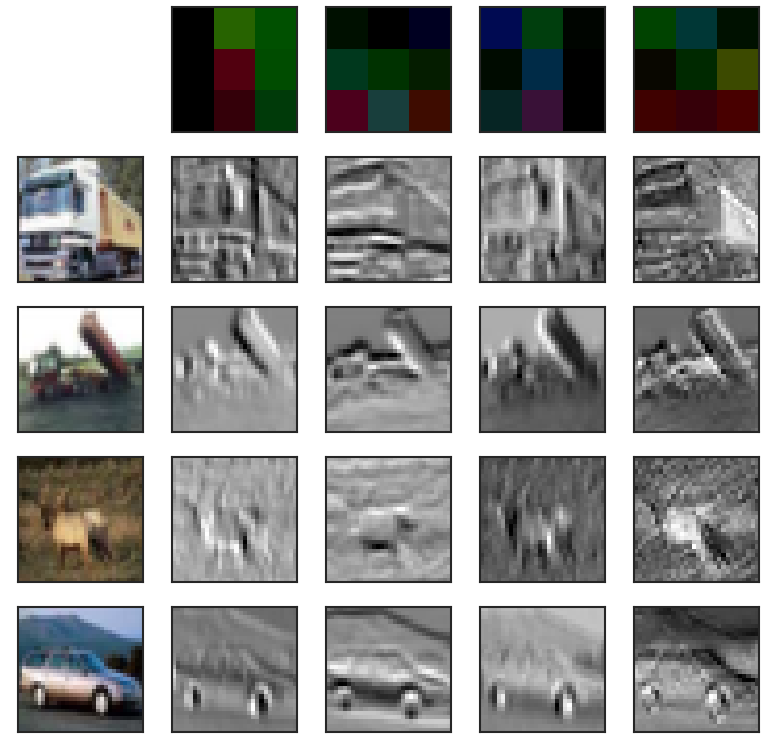

In [155]:
fig, axs = plt.subplots(5,5,figsize=(12,12), dpi=80)

for j in range(4):
    axs[0,j+1].imshow(weights[0][...,j])
axs[0,0].remove()

for i in range(1,5):
    
    axs[i,0].imshow(train_images[i])
    for j in range(4):
        convolved_img = convolution_in_2D(train_images[i], weights[0][...,j])
        axs[i,j+1].imshow(convolved_img, cmap='gray')

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

# Comparing performance to dense NN